# <center>Table of Contents</center>

**1. Import Libraries**  
   1.1 Import Required Libraries  
   1.2 Create Environment and Test

**2. Train Model for Normal Version with PPO**  
   2.1 Preprocess Environment  
   2.2 Train the Model  
   2.3 Save the Model  
   2.4 Evaluate the Model

**3. Train Model for Hardcore Version with PPO**  
   3.1 Test the Environment  
   3.2 Preprocess Environment  
   3.3 Train the Hardcore Model  
   3.4 Save the Hardcore Model  
   3.5 Evaluate the Hardcore Model

**4. 5M Hardcore Training Log Analysis**  
   4.1 Data Overview  
   4.2 Reward Trend Over Time  
   4.3 Episode Length Trend Over Time  
   4.4 Correlation Between Reward and Episode Length  
   4.5 Episode Length Moving Average  
   4.6 Recommendations for Improving Episode Length
   
---

# <center>1. Import Libaries</center>

## 1A) Import Libaries

In [14]:
# Import the necessary libraries

# gymnasium is a modern version of the gym library, used to create and interact with reinforcement learning environments
import gymnasium as gym

# Import PPO (Proximal Policy Optimization) from stable-baselines3, which is a popular reinforcement learning algorithm
from stable_baselines3 import PPO, DQN, DDPG

# Import the evaluation function to assess the performance of the trained policy
from stable_baselines3.common.evaluation import evaluate_policy

# Import Monitor to log training information such as rewards and episode lengths
from stable_baselines3.common.monitor import Monitor

# Import utility functions for vectorized environments, normalization, frame stacking, and video recording
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize, VecFrameStack, VecVideoRecorder

# Import os for handling directory creation and file paths
import os 

# Import pandas for handling and analyzing data (e.g., log files)
import pandas as pd

import matplotlib.pyplot as plt

## 1B) Create Env and Test

In [ ]:
# Create the BipedalWalker environment with human-rendering mode enabled
env = gym.make("BipedalWalker-v3", render_mode="human")

In [ ]:
# Reset the environment (start a new episode) - without using seed or options
obs = env.reset()

# Let the agent take random actions for 1000 steps
for _ in range(1000):
    # Take a random action sampled from the environment's action space
    action = env.action_space.sample()
    
    # Step the environment forward using the chosen action
    # The environment returns the new observation (obs), the reward, 
    # whether the episode is done (done), if it was truncated (truncated), and additional info (info)
    obs, reward, done, truncated, info = env.step(action)
    
    # If the episode is finished (either done or truncated), reset the environment for a new episode
    if done or truncated:
        obs = env.reset()

# Close the environment when finished to clean up resources
env.close()

-----
# <center>2. Train Model for Normal Version with PPO</center>

## 2A) Preprocces Enviorment

In [ ]:
env = gym.make("BipedalWalker-v3") #,render_mode = 'rgb_array') 

In [ ]:
# Define the logs directory and create it if it doesn't exist
logs_dir = 'logs'
os.makedirs(logs_dir, exist_ok=True)

# Specify the log filename (change this if needed)
log_filename = ""  # You can change this manually if needed. Default 'monitor.csv', if you add a text it wil be
                    #import as (text).monitor.csv

# Define the path for the monitor log
monitor_log_path = os.path.join(logs_dir, log_filename)

# Wrap the environment with Monitor and save logs to the defined path
env = Monitor(env, filename=monitor_log_path)

In [ ]:
# Wrap the environment in a DummyVecEnv to enable vectorized operations
env = DummyVecEnv([lambda: env])

# Normalize observations and rewards in the environment
# norm_obs: Normalize observations
# norm_reward: Normalize rewards
# clip_obs: Clip the observation values to prevent outliers
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)

# Stack the last n_stack observations (here n_stack=4) to provide temporal information to the agent
env = VecFrameStack(env, n_stack=4)

In [ ]:
video_folder = 'videos'
os.makedirs(video_folder, exist_ok=True)

env = VecVideoRecorder(env, video_folder, record_video_trigger=lambda x: x % 1000 == 0, video_length=200)

## 2B) Train Model

In [ ]:
# Create the PPO model with a Multi-Layer Perceptron (MLP) policy
model = PPO("MlpPolicy", env, verbose=1)

In [ ]:
model.learn(total_timesteps=1000000)

## 2C) Save Model

In [ ]:
model.save("models/ppo_bipedalwalker_1M")

In [ ]:
del model

## 2D) Evaluate Model

In [ ]:
model = PPO.load("models/ppo_bipedalwalker_1M")

In [ ]:
env = gym.make("BipedalWalker-v3", render_mode="human")

In [ ]:
# Evaluate the model (e.g., over 10 episodes)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

print(f"Average reward: {mean_reward} ± {std_reward}")

**Average Reward**: 248.39 ± 112.10
  - **Assessment**: This result indicates that the model is performing quite well overall. The average reward suggests that it has developed an effective policy and undergone a successful learning process. The high standard deviation (112.10) indicates that the model achieved significantly higher rewards in some trials while scoring lower in others, implying variability in its responses to different situations. This variability highlights the need for further analysis to understand how the model interacts with its environment.

------
# <center>3. Train Model for Hardcore Version with PPO</center>

## 3A) Test Enviroment

In [ ]:
env = gym.make("BipedalWalker-v3", hardcore=True, render_mode="human")

In [ ]:
# Reset the environment (start a new episode) - without using seed or options
obs = env.reset()

# Let the agent take random actions for 1000 steps
for _ in range(1000):
    # Take a random action sampled from the environment's action space
    action = env.action_space.sample()
    
    # Step the environment forward using the chosen action
    # The environment returns the new observation (obs), the reward, 
    # whether the episode is done (done), if it was truncated (truncated), and additional info (info)
    obs, reward, done, truncated, info = env.step(action)
    
    # If the episode is finished (either done or truncated), reset the environment for a new episode
    if done or truncated:
        obs = env.reset()

# Close the environment when finished to clean up resources
env.close()

## 3B) Preprocces Enviorment

In [ ]:
env = gym.make("BipedalWalker-v3", hardcore=True) #,render_mode = 'rgb_array')

In [ ]:
# Define the logs directory and create it if it doesn't exist
logs_dir = 'logs'
os.makedirs(logs_dir, exist_ok=True)

# Specify the log filename (change this if needed)
log_filename = "5m_hardcore"  # You can change this manually if needed. Default 'monitor.csv', if you add a text it wil be
                    #import as (text).monitor.csv

# Define the path for the monitor log
monitor_log_path = os.path.join(logs_dir, log_filename)

# Wrap the environment with Monitor and save logs to the defined path
env = Monitor(env, filename=monitor_log_path)

In [5]:
# Wrap the environment in a DummyVecEnv to enable vectorized operations
env = DummyVecEnv([lambda: env])

# Normalize observations and rewards in the environment
# norm_obs: Normalize observations
# norm_reward: Normalize rewards
# clip_obs: Clip the observation values to prevent outliers
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)

# Stack the last n_stack observations (here n_stack=4) to provide temporal information to the agent
env = VecFrameStack(env, n_stack=4)

In [ ]:
# Define the video folder and create it if it doesn't exist
video_folder = 'videos'
os.makedirs(video_folder, exist_ok=True)

# Wrap the environment with VecVideoRecorder to record videos
# The recording is triggered every 1000 steps and each video will be 200 steps long
env = VecVideoRecorder(env, video_folder, record_video_trigger=lambda x: x % 1000 == 0, video_length=200)

## 3C) Train Model

In [ ]:
# Create the PPO model with a Multi-Layer Perceptron (MLP) policy
model = PPO("MlpPolicy", env, verbose=1)

In [ ]:
model.learn(total_timesteps=5000000)

## 3D) Save Model

In [ ]:
model.save("models/ppo_bipedalwalker_hardcore_3M")

In [ ]:
del model

## 3E) Evaluate Model 3M Model

In [ ]:
model = PPO.load("models/ppo_bipedalwalker_hardcore_3M")

In [ ]:
env = gym.make("BipedalWalker-v3", hardcore=True, render_mode="human")

In [ ]:
# Evaluate the model (e.g., over 10 episodes)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

print(f"Average reward: {mean_reward} ± {std_reward}")

**Average Reward**: -28.23 ± 24.82
  - **Assessment**: This result shows that the model is underperforming in the more challenging environment. A negative average reward indicates that the model mostly receives unfavorable feedback and struggles to achieve the target. The lower standard deviation (24.82) suggests less variability in performance, indicating that the model consistently performs poorly under difficult conditions. This may imply that the model requires more training and potentially different hyperparameter settings.

## 3F) Evaluate Model 5M Model

In [ ]:
del model

In [2]:
model = PPO.load("models/ppo_bipedalwalker_hardcore_5M")

In [3]:
env = gym.make("BipedalWalker-v3", hardcore=True)

In [7]:
# Evaluate the model (e.g., over 100 episodes)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"Average reward: {mean_reward} ± {std_reward}")

Average reward: -10.658702780079517 ± 3.914813643721886


**Average Reward**: -10.66 ± 3.91  
- **Assessment**: This result indicates that the model is not performing well in the environment, as evidenced by the negative average reward. A negative score suggests that the agent primarily receives penalties, reflecting its struggle to reach the desired outcomes. The standard deviation of 3.91 indicates relatively low variability in performance, meaning the model consistently underperforms rather than showing sporadic successes. This suggests that the model may benefit from further training and adjustments in hyperparameters to improve its learning effectiveness.

-----
# <center>4. 5m Hardcore Training Log Analysis </center>

This section provides an in-depth analysis of the 5m hardcore training logs. The analysis focuses on key metrics such as reward, episode length, and their correlation, with visualizations to help interpret the results effectively.

## 4A) Data Overview

The training log contains three key columns:
- `reward`: The reward obtained by the agent in each episode.
- `episode_length`: The length (number of steps) of each episode.
- `time`: The time elapsed during the training process.

We start by loading the data and cleaning it for further analysis.

In [11]:
# Load the dataset
data = pd.read_csv('logs/5m_hardcore.monitor.csv', skiprows=1)
data.columns = ['reward', 'episode_length', 'time']
data_clean = data.dropna()

In [12]:
# Display the first few rows
data_clean.head()

,reward,episode_length,time
0,-111.344846,37,12.434577
1,-114.761356,1600,12.875852
2,-104.014210,1600,13.608708
3,-103.486234,1600,14.326105
4,-105.772329,76,14.347705


## 4B) Reward Trend Over Time


In the first step, we visualize how the reward evolves over time during training. This helps in understanding how well the agent is performing over the course of training.

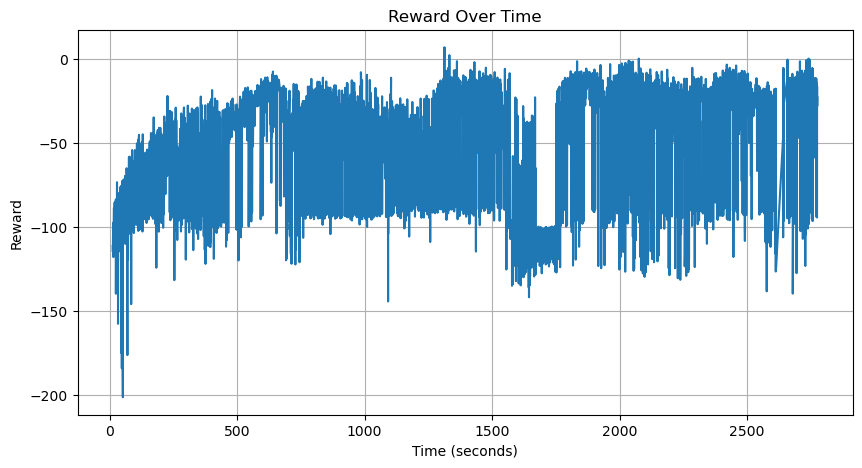

In [15]:
# Plot reward over time
plt.figure(figsize=(10, 5))
plt.plot(data_clean['time'], data_clean['reward'], label='Reward')
plt.title('Reward Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Reward')
plt.grid(True)
plt.show()

**Insight:**
The reward fluctuates significantly over time but shows a general stabilization trend. This suggests that the agent may have reached a steady learning phase where its performance remains stable with minor variations.


## 4C) Episode Length Trend Over Time

Next, we examine how the episode length changes over time. This metric helps understand how long the agent survives or performs in each episode.

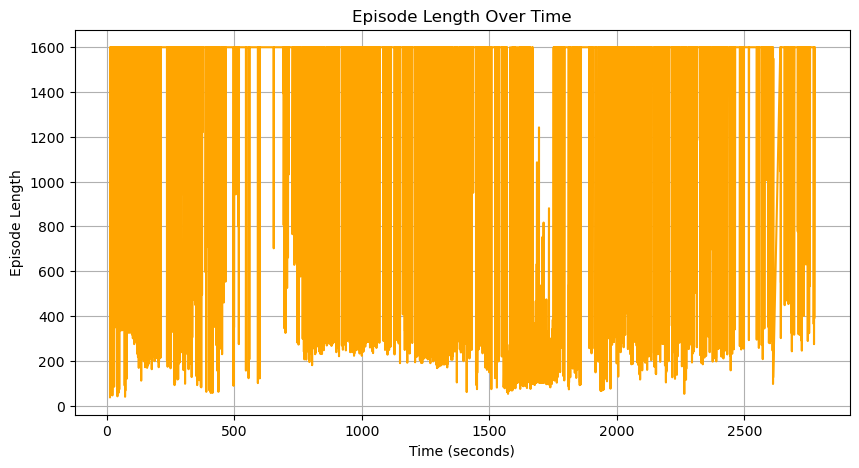

In [16]:
# Plot episode length over time
plt.figure(figsize=(10, 5))
plt.plot(data_clean['time'], data_clean['episode_length'], label='Episode Length', color='orange')
plt.title('Episode Length Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Episode Length')
plt.grid(True)
plt.show()

**Insight:**
The episode length tends to remain relatively high throughout the training, with occasional dips. This indicates that the agent consistently completes longer episodes, which could mean it is learning to survive longer in the environment.

## 4D) Correlation Between Reward and Episode Length

A key question is whether there is a correlation between the reward and the episode length. To investigate this, we calculate the correlation coefficient between these two variables.

In [17]:
# Calculate the correlation between reward and episode length
correlation = data_clean['reward'].corr(data_clean['episode_length'])
print(f'Correlation between reward and episode length: {correlation:.2f}')

Correlation between reward and episode length: 0.89


**Insight:**
The calculated correlation is 0.89, which indicates a strong positive correlation. This means that as the episode length increases, the reward also tends to increase. Essentially, the longer the agent survives, the more reward it earns.

## 4E) Episode Length Moving Average

To smooth out the episode length data and observe longer-term trends, we use a moving average with a window size of 50.

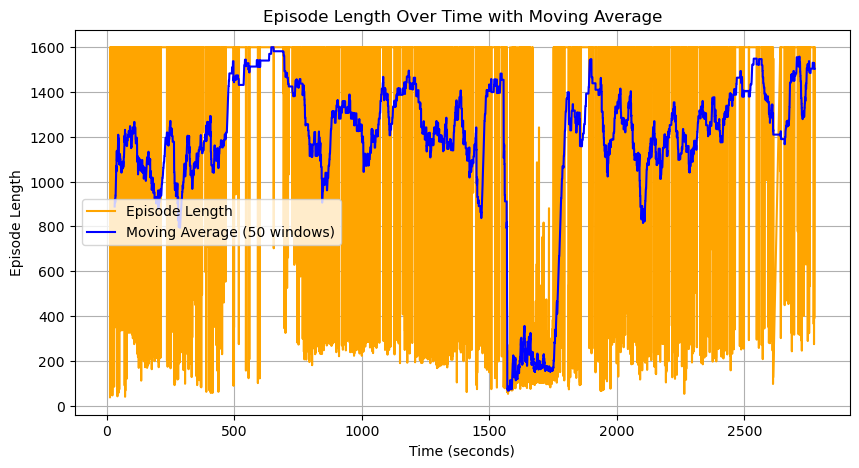

In [19]:
# Moving average of episode length
window_size = 50
data_clean['episode_length_ma'] = data_clean['episode_length'].rolling(window=window_size).mean()

# Plot episode length with moving average
plt.figure(figsize=(10, 5))
plt.plot(data_clean['time'], data_clean['episode_length'], label='Episode Length', color='orange')
plt.plot(data_clean['time'], data_clean['episode_length_ma'], label=f'Moving Average ({window_size} windows)', color='blue')
plt.title('Episode Length Over Time with Moving Average')
plt.xlabel('Time (seconds)')
plt.ylabel('Episode Length')
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
The moving average reveals that the episode length has a slight upward trend over time, indicating that the agent may be gradually learning to perform longer episodes as training progresses.

## 4F) Recommendations for Improving Episode Length

Based on the analysis, here are some strategies to potentially increase the episode length and improve agent performance:

**1. Adjust Learning Rate:** Consider lowering the learning rate to allow for more gradual improvements.

**2. Modify Reward Function:** Adjust the reward structure to incentivize the agent for surviving longer in each episode.

**3. Increase Exploration:** Encourage more exploration by adjusting the epsilon in ε-greedy policies or employing curiosity-driven methods.

**4. Extend Training Duration:** Increasing the number of timesteps during training may allow the agent to learn better strategies for longer survival.

**5. Use Experience Replay:** Implementing experience replay could help the agent learn from past episodes and improve over time.

By following these recommendations, the agent’s performance could be enhanced, leading to longer episode durations and improved rewards.

---

This write-up includes Markdown text for Jupyter, along with code snippets for generating visualizations and insights. It summarizes key findings such as reward trends, episode length behavior, and actionable steps to improve training.